In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/2023빅콘

/content/drive/MyDrive/Colab Notebooks/2023빅콘


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('mode.chained_assignment',  None) # 복사 경고 무시

# recital 데이터

In [159]:
# 데이터 불러오기
data = pd.read_csv('Data/recital.csv', encoding = 'UTF8')
df = pd.DataFrame(data)

In [160]:
df.head()

,tran_time,play_st_time,price,ticket_cancel,open_date,genre,place,running_time,intermission,member_yn,disc_t,disc_p_int,membership_type,play_date_quarter,seat_f,seat_c,seat_b
0,1122,1930,20000,2,20200124.0,독주,리사이틀홀,100,15,Y,기타,1.0,1.0,2020_1,1,3,BLOCK
1,1352,1400,10000,0,20191214.0,독주,리사이틀홀,90,15,Y,기타,1.0,1.0,2020_1,2,1,BLOCK
2,1456,1930,20000,0,20210118.0,독주,리사이틀홀,90,15,Y,기타,1.0,3.0,2021_1,1,4,BLOCK
3,1917,1400,20000,0,20220120.0,독주,리사이틀홀,100,15,Y,기타,1.0,1.0,2022_1,1,9,BLOCK
4,1801,1400,40000,0,20210613.0,독주,리사이틀홀,90,15,Y,기타,1.0,1.0,2021_3,1,2,BLOCK


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346065 entries, 0 to 346064
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tran_time          346065 non-null  int64  
 1   play_st_time       346065 non-null  int64  
 2   price              346065 non-null  int64  
 3   ticket_cancel      346065 non-null  int64  
 4   open_date          346065 non-null  float64
 5   genre              346065 non-null  object 
 6   place              346065 non-null  object 
 7   running_time       346065 non-null  int64  
 8   intermission       346065 non-null  int64  
 9   member_yn          346065 non-null  object 
 10  disc_t             346065 non-null  object 
 11  disc_p_int         346065 non-null  float64
 12  membership_type    346065 non-null  float64
 13  play_date_quarter  346065 non-null  object 
 14  seat_f             346065 non-null  int64  
 15  seat_c             346065 non-null  int64  
 16  se

In [162]:
all_columns = df.columns.tolist()
num_columns = df._get_numeric_data().columns.tolist()
cat_columns = list(set(all_columns) - set(num_columns))

In [163]:
num_columns

['tran_time',
 'play_st_time',
 'price',
 'ticket_cancel',
 'open_date',
 'running_time',
 'intermission',
 'disc_p_int',
 'membership_type',
 'seat_f',
 'seat_c']

In [164]:
cat_columns

['member_yn', 'seat_b', 'disc_t', 'genre', 'play_date_quarter', 'place']

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346065 entries, 0 to 346064
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tran_time          346065 non-null  int64  
 1   play_st_time       346065 non-null  int64  
 2   price              346065 non-null  int64  
 3   ticket_cancel      346065 non-null  int64  
 4   open_date          346065 non-null  float64
 5   genre              346065 non-null  object 
 6   place              346065 non-null  object 
 7   running_time       346065 non-null  int64  
 8   intermission       346065 non-null  int64  
 9   member_yn          346065 non-null  object 
 10  disc_t             346065 non-null  object 
 11  disc_p_int         346065 non-null  float64
 12  membership_type    346065 non-null  float64
 13  play_date_quarter  346065 non-null  object 
 14  seat_f             346065 non-null  int64  
 15  seat_c             346065 non-null  int64  
 16  se

In [166]:
df = df[df['price'] != 0]

## 데이터 분할

In [167]:
X = df.drop(columns = ['price'])
y = df['price']

## 범주형 변수 레이블인코딩

In [168]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns :
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])

## 변수 표준화

In [169]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)
print("train 데이터: ", y_train.shape)
print("test 데이터: ", y_test.shape)

train 데이터:  (29017, 16)
test 데이터:  (12437, 16)
train 데이터:  (29017,)
test 데이터:  (12437,)


## 의사결정나무

In [170]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state=42, max_depth = 6)

In [171]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [172]:
dt.score(X_train, y_train)

0.7054485301719682

In [173]:
dt.score(X_test, y_test)

0.70258100828174

In [174]:
dt.predict(X_test)[:5]

array([20000, 20000, 20000, 15000, 20000])

In [175]:
y_test[:5]

5148      30000
12472     20000
7364      20000
337449    15000
3488      20000
Name: price, dtype: int64

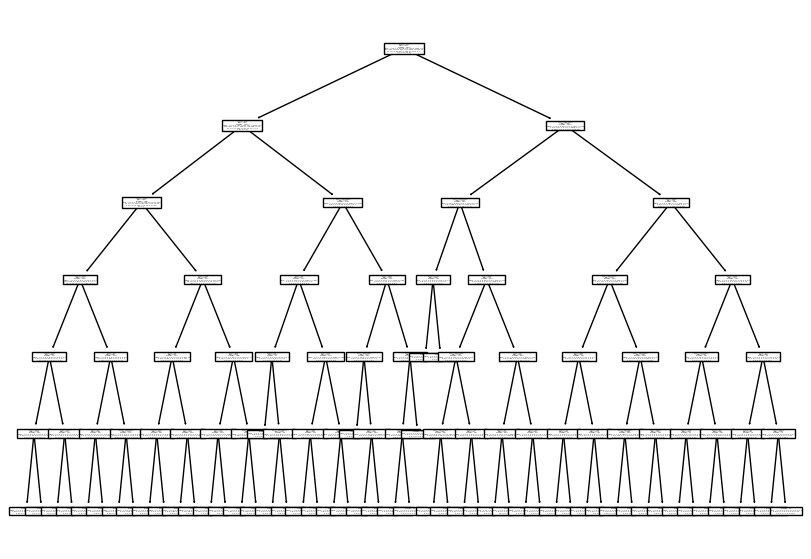

In [176]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

tran_time : 0.0
play_st_time : 0.01198827384976845
ticket_cancel : 0.0
open_date : 0.07648498968124283
genre : 0.012583283123881557
place : 0.0
running_time : 0.034819950076758144
intermission : 0.03010745905407793
member_yn : 0.0
disc_t : 0.05258621381041263
disc_p_int : 0.7730709323368025
membership_type : 0.0
play_date_quarter : 0.0013170854056090686
seat_f : 0.0
seat_c : 0.00686220263523632
seat_b : 0.00017961002621067162
Axes(0.125,0.11;0.775x0.77)


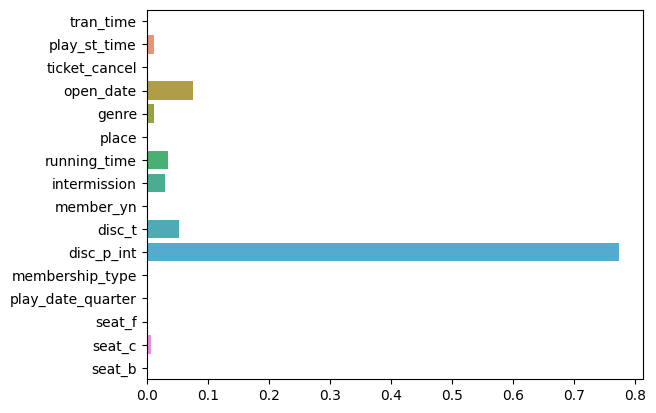

In [177]:
for name, value in zip(X.columns, dt.feature_importances_):
    print(f"{name} : {value}")

## seaborn을 이용한 시각화
print(sns.barplot(x=dt.feature_importances_, y=X.columns))

## 랜덤 포레스트 회귀

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [179]:
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5,6,7,8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': (5, 6, 7, 8), 'min_samples_leaf': (8, 18),
                         'min_samples_split': (8, 16),
                         'n_estimators': (100, 200)})

In [180]:
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.5875


In [181]:
rf = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

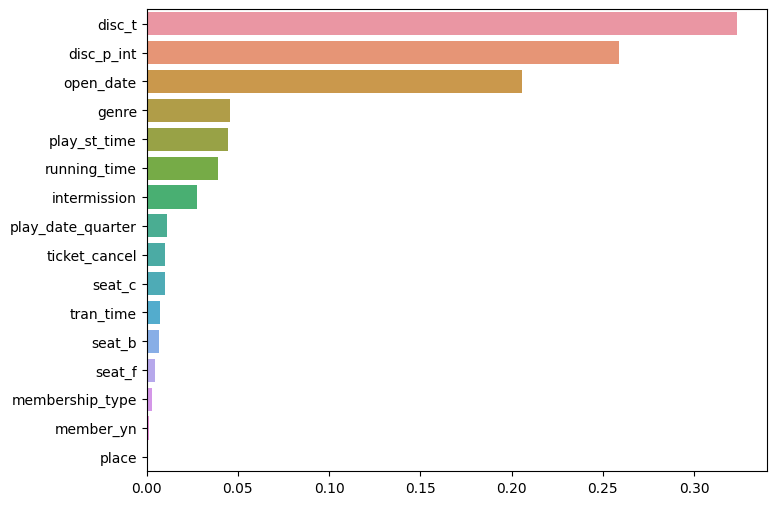

In [182]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
